<a href="https://colab.research.google.com/github/akaumov/tensorflow-intro/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Basics. Training first model.**

Farengeit function

In [0]:
def F(x):
  return x*1.8 + 32

In [119]:
import numpy as np

celcius_values = np.array([])
farengheit_values = np.array([])

for value in range(0,32,3):
  celcius_values = np.append(celcius_values, value)
  farengheit_values = np.append(farengheit_values, F(value))
  print("Celcius = {} Farengheit = {}".format(value, F(value)))
  
print("values => {} {}".format(celcius_values, farengheit_values))
  

Celcius = 0 Farengheit = 32.0
Celcius = 3 Farengheit = 37.4
Celcius = 6 Farengheit = 42.8
Celcius = 9 Farengheit = 48.2
Celcius = 12 Farengheit = 53.6
Celcius = 15 Farengheit = 59.0
Celcius = 18 Farengheit = 64.4
Celcius = 21 Farengheit = 69.80000000000001
Celcius = 24 Farengheit = 75.2
Celcius = 27 Farengheit = 80.6
Celcius = 30 Farengheit = 86.0
values => [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30.] [32.  37.4 42.8 48.2 53.6 59.  64.4 69.8 75.2 80.6 86. ]


In [0]:
import tensorflow as tf

In [0]:
#setup tensor flow logger

import logging

logger = tf.get_logger();
logger.setLevel(logging.ERROR)

# Create the model

## Build a layer


*   input_shape=[1] - Tells that we will use for input single value. That is, shape is a one-dimensional array;
*   units=1 - Tells use only one neuron in the layer. Also it shows that this layer will have only one output




In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Build model from layers

In [0]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions


*   Loss function - shows how far predicted value from desired value
*   Optimizer function - adjust internal values to reduce the loss



In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

**fit** function trains the model by using loss function and optimizer function. We provide to train function input and output values. Trainig function adjusts internal weights by using optimizer function.

In [0]:
history = model.fit(celcius_values, farengheit_values, epochs=1000, verbose=False)

## Display training statistics

The graphic below shows how loss is reduce in each training epoch

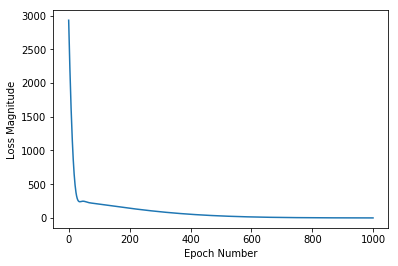

In [126]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

In [127]:
print("Predicted value = {}".format(model.predict([100])))

Predicted value = [[216.73885]]


In [128]:
print("Actual value = {}".format(F(100)))

Actual value = 212.0


## Looking at the  layer weights

In [129]:
print("Layer weights: {}".format(l0.get_weights()))

Layer weights: [array([[1.8598073]], dtype=float32), array([30.758114], dtype=float32)]


## Experiment

What if we will create model with more layers?

Predicted value = [[212.00002]]
l0 weights = [array([[ 0.19889055,  0.900074  , -0.264487  ,  0.05928422]],
      dtype=float32), array([3.6436384 , 3.6898181 , 3.162673  , 0.37495187], dtype=float32)]
l1 weights = [array([[-0.73049355, -0.877203  , -0.7848131 ,  0.0503989 ],
       [-0.72963274,  0.26291415, -0.9118934 ,  0.76220244],
       [-0.50683254,  0.21102157, -0.93698657,  0.5506716 ],
       [-0.42249912,  0.48881114,  0.14725448,  0.04381904]],
      dtype=float32), array([-3.8166566 , -0.15127532, -3.5027232 ,  3.1776016 ], dtype=float32)]
l2 weights = [array([[-0.514814  ],
       [-0.08706776],
       [-0.9980403 ],
       [ 1.3153452 ]], dtype=float32), array([3.1959016], dtype=float32)]


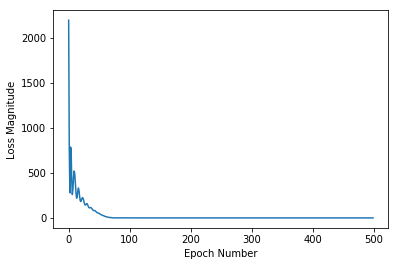

In [130]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celcius_values, farengheit_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

print("Predicted value = {}".format(model.predict([100])))

print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))

## Experiment 2

Try to predict y(x) = x *x function

In [131]:
def F2(x):
  return x * x

f2_input_values = np.array([])
f2_output_values = np.array([])

for value in range (0, 25, 2):
  f2_input_values = np.append(f2_input_values, value)
  f2_output_values = np.append(f2_output_values, F2(value))

print("F2 values input = {} output = {}".format(f2_input_values, f2_output_values))
  

F2 values input = [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24.] output = [  0.   4.  16.  36.  64. 100. 144. 196. 256. 324. 400. 484. 576.]


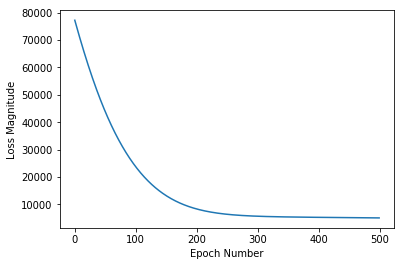

In [132]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(f2_input_values, f2_output_values, epochs=500, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

**Let's compare our predictions on 2D graphic**

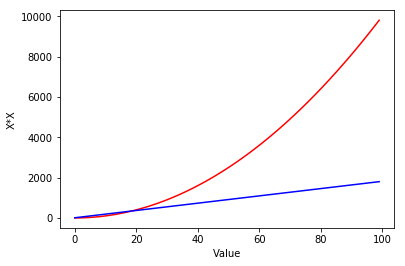

In [133]:
f2_input_test_values = np.array([])
f2_predicted_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 1):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')

### Summary:
System with one neuron can predict only linear data

### Let's try to model our function with more complex model with multiple neurons

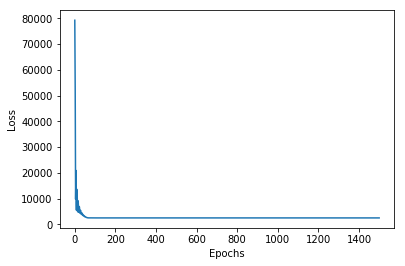

In [134]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=4)
l3 = tf.keras.layers.Dense(units=4)
l4 = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([l0, l1, l2, l3, l4])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model2.fit(f2_input_values, f2_output_values, epochs=1500, verbose=False)

import matplotlib.pyplot as plt

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"])

l0 weights = [array([[ 0.7338541 , -1.4631648 ,  0.5171489 ,  0.19271976]],
      dtype=float32), array([-2.2360666,  1.7628924, -2.796809 , -1.1772872], dtype=float32)]
l1 weights = [array([[-0.6349449 ,  0.08616359, -0.01765263, -1.5020938 ],
       [-0.45232505, -0.6800494 , -0.972311  ,  1.0143611 ],
       [-0.7614115 ,  0.93601483,  0.6958388 , -0.14159597],
       [ 0.0060686 , -0.6345137 ,  0.9598831 , -0.47015727]],
      dtype=float32), array([ 1.8083836, -1.2315036, -1.7460183,  1.4768646], dtype=float32)]
l2 weights = [array([[ 0.00337537,  0.19497423,  1.0167874 ,  0.7960888 ],
       [-0.81638026, -0.24081717,  0.15893042, -0.9862021 ],
       [-0.21310705,  0.7186266 ,  0.11273953, -1.1039932 ],
       [-0.3462792 ,  0.19226351,  0.06406358,  1.2902938 ]],
      dtype=float32), array([ 0.98695225, -0.6978285 , -2.0564911 ,  1.0382409 ], dtype=float32)]
l2 weights = [array([[-0.5098255 , -0.13692296, -0.00677286, -1.4129477 ],
       [ 0.37926096,  0.3961618 ,  0.24996561

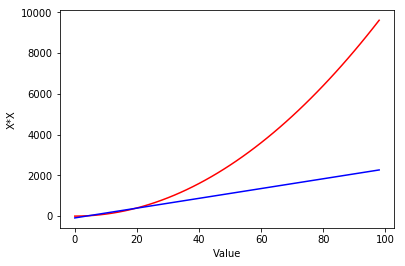

In [135]:
f2_input_test_values = np.array([])
f2_actual_values = np.array([])

for value in range (0, 100, 2):
  f2_input_test_values = np.append(f2_input_test_values, value)
  f2_actual_values = np.append(f2_actual_values, F2(value))
  
f2_predicted_values = model2.predict(f2_input_test_values)
import matplotlib.pyplot as plt

plt.xlabel("Value")
plt.ylabel("X*X")
plt.plot(f2_input_test_values, f2_actual_values, color='red')
plt.plot(f2_input_test_values, f2_predicted_values, color='blue')
print("l0 weights = {}".format(l0.get_weights()))
print("l1 weights = {}".format(l1.get_weights()))
print("l2 weights = {}".format(l2.get_weights()))
print("l2 weights = {}".format(l3.get_weights()))
print("l2 weights = {}".format(l4.get_weights()))

## Questions:


Why we can't model non-linear functions, is it because we use linear functions inside neurouns?

